### Exploratory Data Analysis

In this file, we will dig into the wildfire incident data further using:

- bar charts to observe trends over time
- scatterplots to look for relationships in the data
- investigations of outliers

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
fires_df_clean = pd.read_csv('./claire_data/fires_compiled.csv')

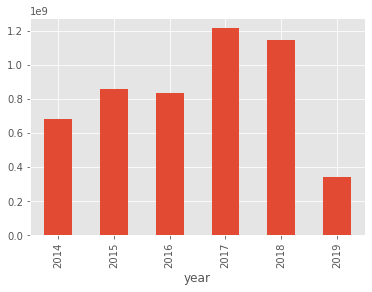

In [3]:
fires_df_clean.groupby('year')['Costs'].sum().plot(kind='bar');

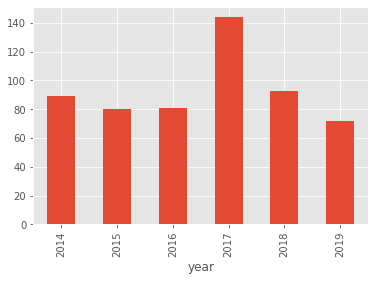

In [4]:
fires_df_clean.groupby('year')['Incident Number'].count().plot(kind='bar');

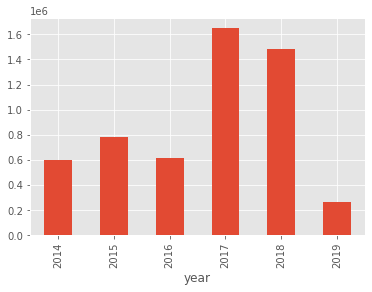

In [5]:
fires_df_clean.groupby('year')['Size'].sum().plot(kind='bar');

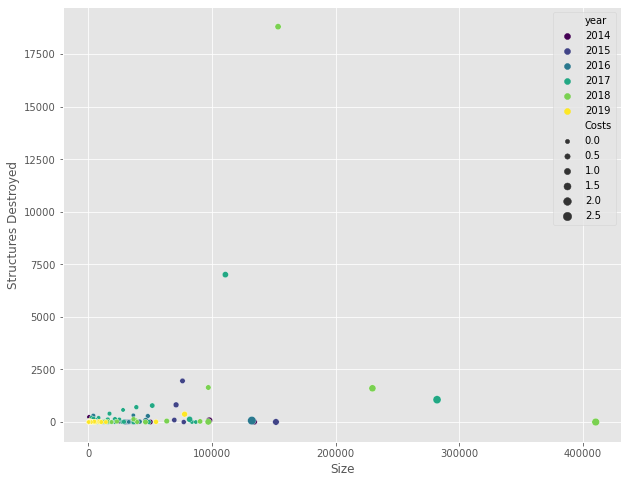

In [6]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Structures Destroyed', 
                data = fires_df_clean, 
                size= 'Costs',
                hue='year',
                palette='viridis')
plt.legend(loc='best');

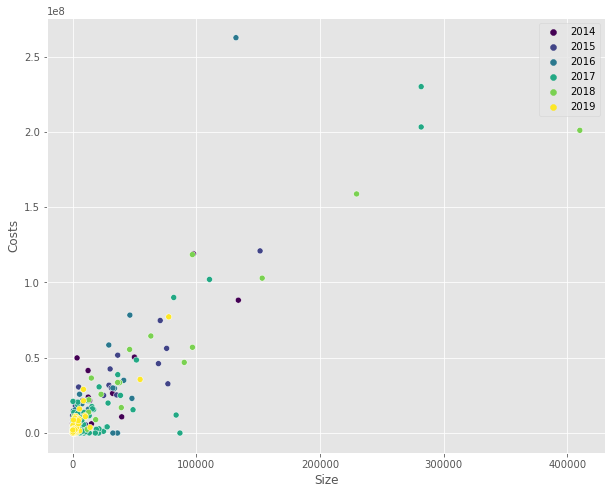

In [7]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

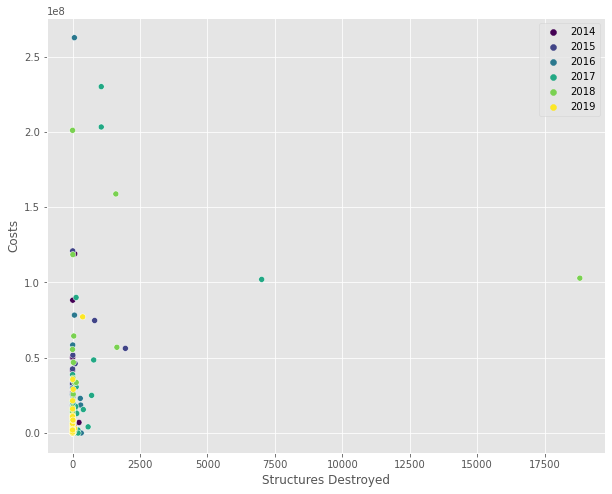

In [8]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Structures Destroyed', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

In [9]:
fires_df_clean.sort_values(by='Structures Destroyed', ascending=False).head()

,Incident Number,Incident Name,Incident Type,Latitude,Longitude,Size,Unit of Measure,Costs,Structures Destroyed,start_date,year,county
425,CA-BTU-016737,CAMP,WF,40,121,153336.0,Acres,102843527.0,18804,2018-11-08,2018,Plumas
269,CA-LNU-010104,CENTRAL LNU COMPLEX,WF,38,123,110720.0,Acres,102000000.0,7010,2017-10-09,2017,Marin
102,CA-LNU-008670,VALLEY,WF,39,123,76067.0,Acres,56220000.0,1958,2015-09-12,2015,Lake
475,CA-VNC-091023,WOOLSEY,WF,34,119,96949.0,Acres,56943320.0,1643,2018-11-08,2018,Ventura
421,CA-WNP-001084,CARR,WF,41,123,229651.0,Acres,158744844.0,1604,2018-07-23,2018,Siskiyou
